In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import rain

In [2]:
def resampleData(df, per):
    df["volume"] = df["volume"].rolling(window = per).sum()
    return df.iloc[::per, :].reset_index()

In [3]:
df = pd.read_csv(rain.toRelPath("data/df-cache.csv"))
df = resampleData(df, 30)

mid = df["mid"]
volume = df["volume"]

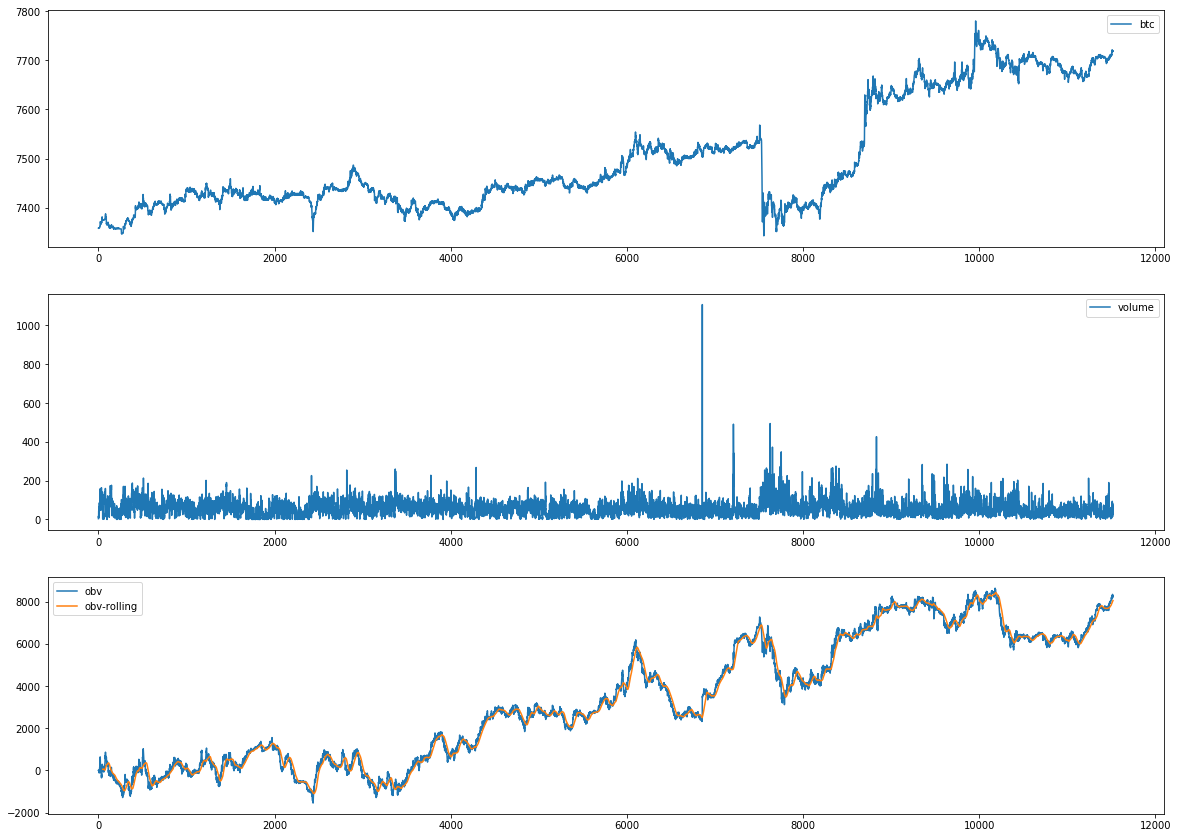

In [4]:
def computeOBV(series, volume):
    dMid = series - series.shift(1)
    dMid[dMid > 0] = 1
    dMid[dMid < 0] = -1
    vMod = volume * dMid
    return vMod.cumsum()

obv = computeOBV(mid, volume)
obvRAve = obv.rolling(window = 50).mean()

plt.figure(figsize = (20, 20))
plt.subplot(4, 1, 1)
plt.plot(mid, label = "btc")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(volume, label = "volume")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(obv, label = "obv")
plt.plot(obvRAve, label = "obv-rolling")
plt.legend()
plt.show()